# Assignment 03

Dear Team,

I hope you are doing GREAT!

The following assignment is divided in two parts:
- Part A: Please, run the pre-coded cells to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 01 and 02
- Part B: Please, run the pre-coded cells to train the given Neural Network and then respond to the questions 03 to 10

The idea of the current assignment is to intensify what we have learned about Convolutional Neural Networks (chapter 5 of the *Deep Learning With Python* book).

There are some new concepts and challenges that we will face in the current assignment, and we need to resolve each issue and move to the next step.

The assignment is easy to follow yet needs the patience to solve each question at a time.

**Note:**

Please note that every question has 0.5 and it provides five out of total ten marks for the assignment.

The video presentation, as you have done for previous assignments, provides the rest of the mark, which is 5.

In short, 5 for coding + 5 for the video presentation = 10, but without YouTube presentation you receive no mark for the submission. In short, only submissions with YouTube link will be marked.

# PART A

## Image Convolution

In [1]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [2]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [3]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [4]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




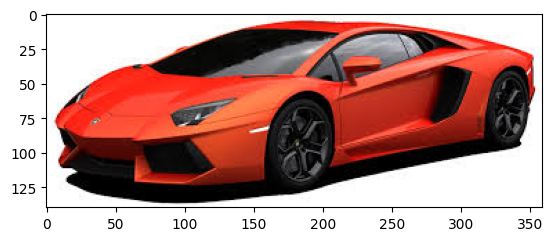

In [5]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [6]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


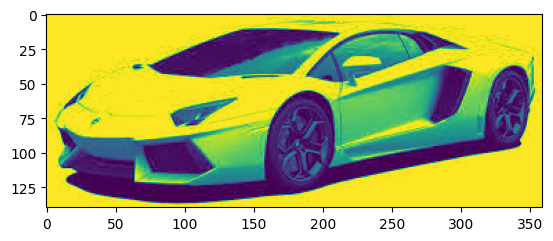

In [7]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

In [8]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [9]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0], 
                   [0, 1, 0], 
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [10]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [11]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

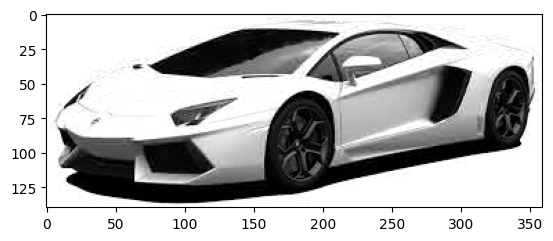

In [12]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [13]:
# Define a function to squash out the values between 0-255 range. 
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [14]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_array = np.zeros(image_array_2d.shape)
 
    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

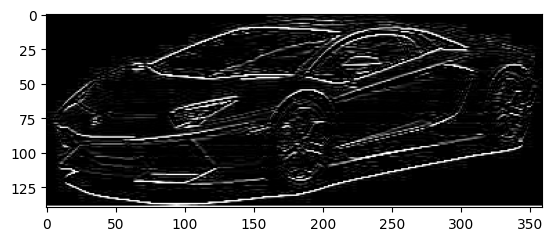

In [15]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

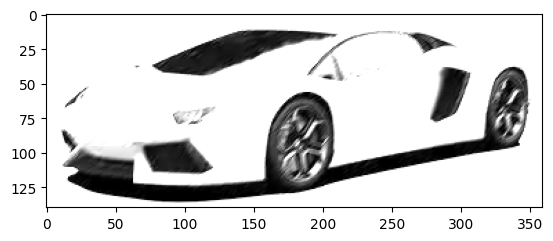

In [17]:
#Create a kernel (filter) to detect diagonal lines (45 degree)
fortyfive_degree_kernel = np.array([[0, 0, 1],
                                    [0, 1, 0],
                                    [1, 0, 0]])

#Apply the kernel to the image
transf_fortyfive = conv_2d_kernel(input_img_arr, kernel = fortyfive_degree_kernel)

#Plot the resulting image
plt.imshow(transf_fortyfive, cmap = plt.get_cmap('gray'))

#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

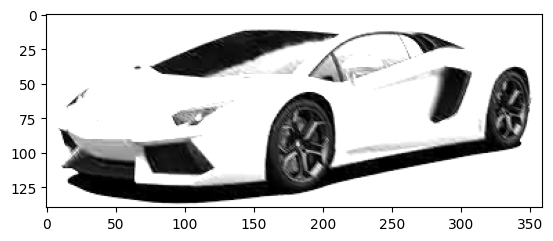

In [20]:
#Create a kernel (filter) to detect diagonal lines (135 degree is opposite to 45 )
onethirtyfive_degree_kernel = np.array([[1, 0, 0],
                                        [0, 1, 0],
                                        [0, 0, 0]])

#Apply the kernel to the image
transf_onethirtyfive = conv_2d_kernel(input_img_arr, kernel = onethirtyfive_degree_kernel)

#Plot the resulting image
plt.imshow(transf_onethirtyfive, cmap = plt.get_cmap('gray'))


## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [ ]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

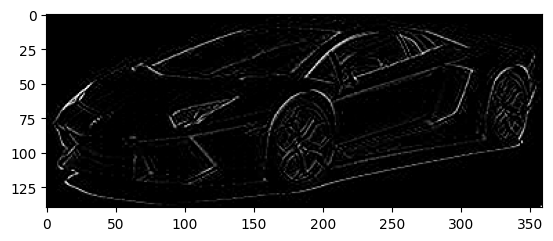

In [21]:
#Create a kernel (filter)
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

#Apply the kernel to the image
transf = conv_2d_kernel(input_img_arr, kernel = edge_kernel_1)

#Plot the resulting image
plt.imshow(transf, cmap = plt.get_cmap('gray'))

#### 02-b:

In [ ]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

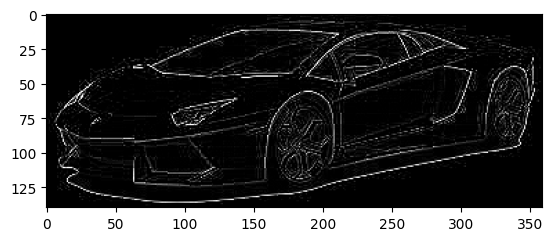

In [22]:
#Create a kernel (filter)
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

#Apply the kernel to the image
transf_2 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_2)

#Plot the resulting image
plt.imshow(transf_2, cmap = plt.get_cmap('gray'))


#### 02-c:

In [ ]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

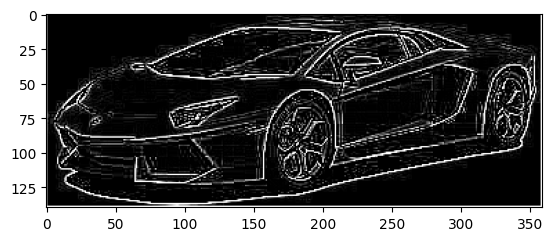

In [23]:
# Type your code here

#Create a kernel (filter)
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

#Apply the kernel to the image
transf_3 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_3)

#Plot the resulting image
plt.imshow(transf_3, cmap = plt.get_cmap('gray'))

# PART B

## Importing Libraries

In [5]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here 
https://www.cs.toronto.edu/~kriz/cifar.html

In [6]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [7]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [4]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),        
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

NameError: ignored

In [28]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Display a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
______________________________________________

## CustomCallback class for logging

In [8]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [9]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [32]:
# Train the Network with train_images and train_labels
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4216800034046173
Accuracy reached val is 0.5034999847412109

 Finished epoch # 5
Accuracy resched train is 0.6507400274276733
Accuracy reached val is 0.6205000281333923

 Finished epoch # 10
Accuracy resched train is 0.7166799902915955
Accuracy reached val is 0.649399995803833

 Finished epoch # 15
Accuracy resched train is 0.764240026473999
Accuracy reached val is 0.6571999788284302

 Finished epoch # 20
Accuracy resched train is 0.8063600063323975
Accuracy reached val is 0.6593999862670898

 Finished epoch # 25
Accuracy resched train is 0.8513399958610535
Accuracy reached val is 0.6482999920845032

 Finished epoch # 30
Accuracy resched train is 0.8815000057220459
Accuracy reached val is 0.6484000086784363

 Finished epoch # 35
Accuracy resched train is 0.9129199981689453
Accuracy reached val is 0.6424999833106995

 Finished epoch # 40
Accuracy resched train is 0.9432799816131592
Accuracy reached val is 0.6417999863624573

 Finished epoc

## Plotting the Results

In [13]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

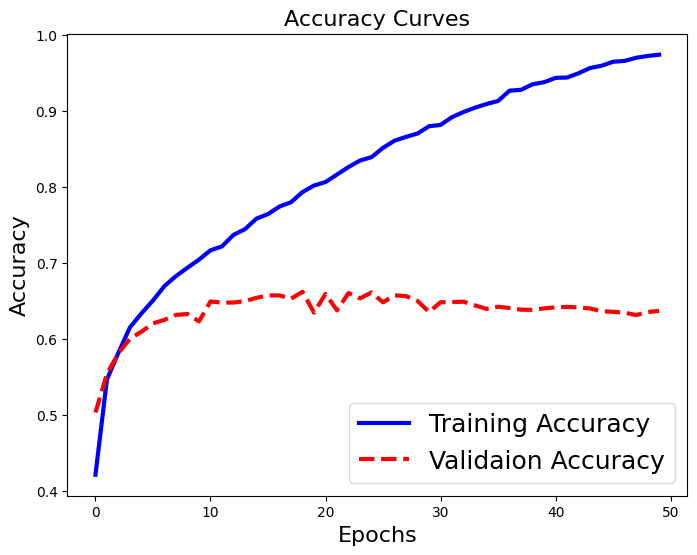

In [34]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network presented signs of overfitting? If so, in which epoch?

Yes the model presents overfitting as we can clearly see the Training Accuracy and Validation Accuracy lines start to diverge at around epoch 4 to 8. I'd say that by epoch 6 the model starts overfitting as the difference between Training Accuracy and Validation Accuracy start increasing by then. 

#### 04: Write down how many layers this model has and identify their types

First of everything, we must take into consideration that we are talking about a Convolutional Neural Network, since it will matter when we anylize its architecture.

1st Hidden Layer Conv 2d -> 32 (filters)

2nd Hidden Layer Max Pooling -> MAX POOLING IS APPLIED TO THE OUTPUT OF PREVIUOS LAYER

3rd Hidden Layer Flatten -> FLATTEN THE OUTPUT TO MAKE IT FEASIBLE TO BE FED INTO THE NEXT LAYER

let's point something out... MaxPooling2D and Flatten layers do not introduce new layers (hyper parameters) to the model, but rather they operate on the output of the Conv2D layer. Hence why we see 0 in the 'Param'(they do not learn any new weights or biases during the training process).

4th Hidden Layer -> 128
5th Hidden Layer -> 10

#### 05: Briefly explain what is the purpose of each of those layers

Expanding previous question... by the help of this video https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard
:



**1st Hidden Layer Conv 2d -> 32 (filters)**

32 input filters (which we could even say that is a set of learnable weigths) that will produce 32 feature map.

it applies a Relu activation function. Just to refresh our mind a relu activation funtion, will return a value that is never negative but always 0 or > 0.

max norm wants to apply regularization so that the weigths will always be constrained to a max value of 3.

Input Shape (32,32,3) should be understood in this way.
  Width Pixels 32
  Height Pixels 32
  3 color channels 



**2nd Hidden Layer Max Pooling**

IS APPLIED TO THE OUTPUT OF THE PREVIOUS CNN LAYER!

Its main purpose is to reduce the spatial dimensions of the feature maps produced by the convolutional layers, while also retaining the most important features of the image. Since we are specifying (2,2) this means that we will reduce the prevoius (3, 3) to half of its demension. This will be done by either multiplying (that's what the video says) or dividing (I think this happens in our case) previous input features.



**3rd Hidden Layer Flatten**

In order for us to serve the previous output (Max Polling) into a fully connected dense layer, we should first flatten it as a 1 dim array.



**4th Hidden Layer -> 128**

Now we finally get to our first densly conencted hidden layer that will execute the relu function on the input. Why so ?

When we apply convolutional and pooling layers to an input image, we are able to extract low-level features, but now we would like to extract high-level features. Fully connected layers are able to extract these higher-level features by taking the features extracted by the previous convolutional and pooling layers and performing a linear transformation on them. 

The ReLU activation function is then applied to this transformed output in order to introduce non-linearity into the model (0 or > 0)


**5th Hidden Layer -> 10**

Generate the final prediction by using a softmax activation function which we sould now that  is commonly used in multi-class classification problems, where we want to predict the probability of each class label for a given input. It transforms the outut of the last dense layer into a probability distribution over the classes, where the sum of the probabilitis is equal to 1.

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [10]:
# Type your code here
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),        
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [11]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.41923999786376953
Accuracy reached val is 0.5313000082969666

 Finished epoch # 5
Accuracy resched train is 0.7030199766159058
Accuracy reached val is 0.6682999730110168

 Finished epoch # 10
Accuracy resched train is 0.7780399918556213
Accuracy reached val is 0.6777999997138977

 Finished epoch # 15
Accuracy resched train is 0.8428999781608582
Accuracy reached val is 0.6733999848365784

 Finished epoch # 20
Accuracy resched train is 0.9004200100898743
Accuracy reached val is 0.6722999811172485

 Finished epoch # 25
Accuracy resched train is 0.9407200217247009
Accuracy reached val is 0.6615999937057495

 Finished epoch # 30
Accuracy resched train is 0.9728000164031982
Accuracy reached val is 0.6561999917030334

 Finished epoch # 35
Accuracy resched train is 0.9782400131225586
Accuracy reached val is 0.6477000117301941

 Finished epoch # 40
Accuracy resched train is 0.9791600108146667
Accuracy reached val is 0.642799973487854

 Finished ep

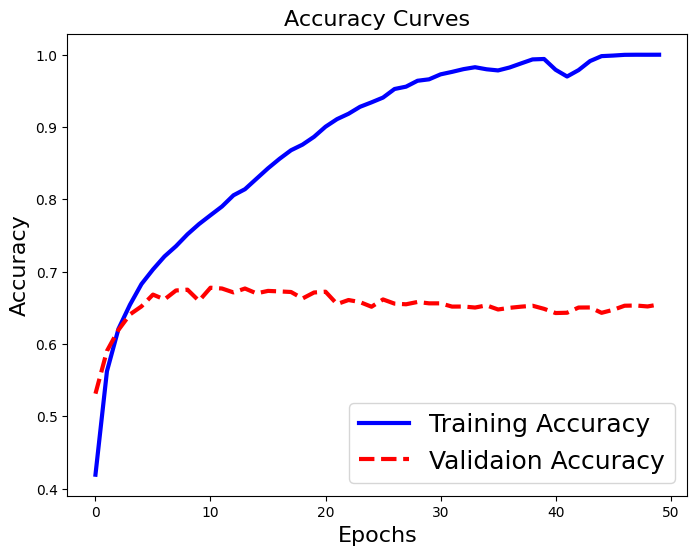

In [14]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results and describe what are the differences between them.

We can clearly see that we have worsen overfitting, as it seams to be happening almost at epoch number 2.

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function




In [15]:
# Type your code here
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dropout(0.5),        
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [16]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4135200083255768
Accuracy reached val is 0.4871000051498413

 Finished epoch # 5
Accuracy resched train is 0.6220200061798096
Accuracy reached val is 0.6279000043869019

 Finished epoch # 10
Accuracy resched train is 0.6718000173568726
Accuracy reached val is 0.6552000045776367

 Finished epoch # 15
Accuracy resched train is 0.7070199847221375
Accuracy reached val is 0.6628999710083008

 Finished epoch # 20
Accuracy resched train is 0.741100013256073
Accuracy reached val is 0.65829998254776

 Finished epoch # 25
Accuracy resched train is 0.7659800052642822
Accuracy reached val is 0.6730999946594238

 Finished epoch # 30
Accuracy resched train is 0.7868199944496155
Accuracy reached val is 0.6662999987602234

 Finished epoch # 35
Accuracy resched train is 0.8071200251579285
Accuracy reached val is 0.6764000058174133

 Finished epoch # 40
Accuracy resched train is 0.8179799914360046
Accuracy reached val is 0.6703000068664551

 Finished epoch

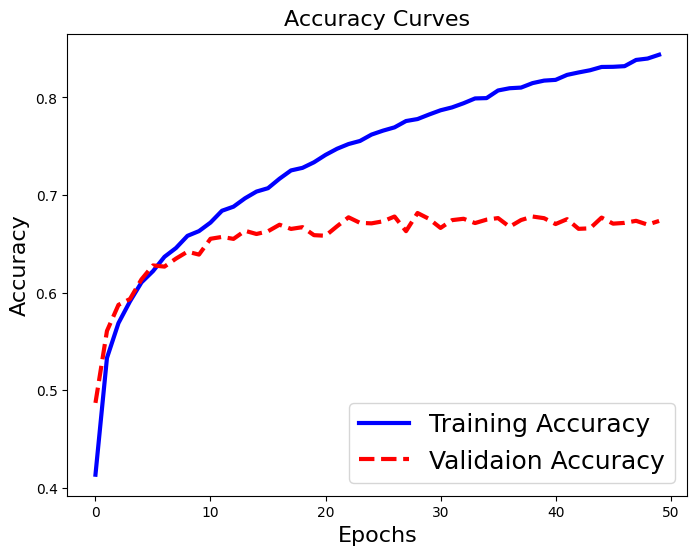

In [17]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works.

It made our model much better, as we can now see that the overfitting starts at about 9 to 11 epoch.

Let's spend a few words on how this happened...

Dropout can help prevent overfitting by randomly dropping out (i.e., setting to 0, not deleting it but just ignoring it) a certain percentage of units in a layer during training. 

This forces the remaining units to learn more robust features that are useful for making predictions.

#### 10: Make any other modification in the hyperparameters to improve the model's accuracy and compare the final result with the previous one.
> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2. run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [24]:
# Type your answer here
model = keras.Sequential([
          keras.layers.Conv2D(16, (4,4), padding='same', 
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dropout(0.5),        
          keras.layers.Dense(80, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [25]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50, 
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.3789199888706207
Accuracy reached val is 0.4724999964237213

 Finished epoch # 5
Accuracy resched train is 0.5611199736595154
Accuracy reached val is 0.5522000193595886

 Finished epoch # 10
Accuracy resched train is 0.6059799790382385
Accuracy reached val is 0.6129999756813049

 Finished epoch # 15
Accuracy resched train is 0.6386399865150452
Accuracy reached val is 0.6313999891281128

 Finished epoch # 20
Accuracy resched train is 0.6636000275611877
Accuracy reached val is 0.6466000080108643

 Finished epoch # 25
Accuracy resched train is 0.6798400282859802
Accuracy reached val is 0.6607000231742859

 Finished epoch # 30
Accuracy resched train is 0.6950600147247314
Accuracy reached val is 0.657800018787384

 Finished epoch # 35
Accuracy resched train is 0.7065600156784058
Accuracy reached val is 0.6687999963760376

 Finished epoch # 40
Accuracy resched train is 0.7182400226593018
Accuracy reached val is 0.661300003528595

 Finished epoc

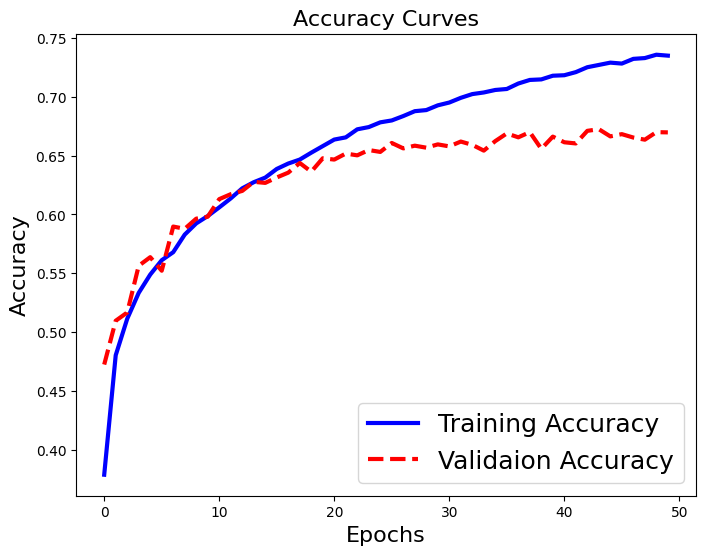

In [26]:
# Call the result_plotting() to display the results from your code
result_plotting()

---
# Deliverables:
1. Please, submit the current ipynb file with your responses.
2. Please record and upload to YouTube a 5 to 10 minutes video recorded clip, describing all you have done. If you go beyond 10 minutes, it is fine. The mentioned time range is to show how the scale of the assignment could be.  

Notes: 
- In your submission, YOU MUST SUBMIT A LINK TO YOUR YOUTUBE VIDEO as a TEXT SUBMISSION SECTION on your BLACKBOARD SUBMISSION. Omitting this BB comment will result in a 0% for your total mark.

- To get the 5% of the (coding) mark, you need to submit a YouTube video that scrolls through your code, explaining every single line of your code.

Then submit the link to the uploaded YouTube video in the **Text Submision section** (see image below).  

![image.png](https://i.ibb.co/gjW5wYC/bb-submission-instructions.png)


**Summary:**

In short, what we need to submit are:

a)	The current **ipynb file** that contains all the code (5 marks).

b)	The **YouTube link** of your recorded video in the **Text Submission section** (5 marks).

Zero for submissions, without YouTube video explanation.


All my best,

Reza
